In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Simulate probability

In [34]:
llama = np.exp(np.load("../data/gen_probs_Llama-2-7b-hf.npy"))
gemma = np.exp(np.load("../data/gen_probs_gemma-7b.npy"))

In [36]:
llama.shape

(1024, 10)

In [41]:
prompts = []
for i in range(1024):
    s = format(i, '010b')
    prompts.append(s)

In [46]:
tab = []
for i in range(len(llama)):
    for j in range(10):
        val = prompts[i][j]
        tab.append((('Llama', llama[i][j], val)))
        tab.append((('Gemma', gemma[i][j], val)))
        
tab = pd.DataFrame(tab)
tab.columns = ["Model", "Probability", "Token"]

In [47]:
tab

,Model,Probability,Token
0,Llama,0.100879,0
1,Gemma,0.148047,0
2,Llama,0.515620,0
3,Gemma,0.731059,0
4,Llama,0.670608,0
...,...,...,...
20475,Gemma,0.777300,1
20476,Llama,0.991812,1
20477,Gemma,0.742982,1
20478,Llama,0.991938,1


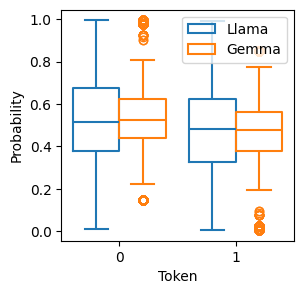

In [52]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=tab, y='Probability', x="Token", hue='Model', fill=False)
plt.legend(loc='upper right')
plt.savefig("../figures/prob_75.pdf", bbox_inches="tight")
plt.show()

# Scenario 1

In [8]:
gemma_s1 = np.load("../data/scenario1_gemma-7b_90.npy")
llama_s1 = np.load("../data/scenario1_Llama-2-7b-hf_90.npy")

In [9]:
perf = gemma_s1.mean(1)
mean = perf[:, 1]
std = gemma_s1.std(1)[:, 1] / np.sqrt(100.0)

In [10]:
mean_l = llama_s1.mean(1)[:, 1]
std_l = llama_s1.std(1)[:, 1] / np.sqrt(100.0)

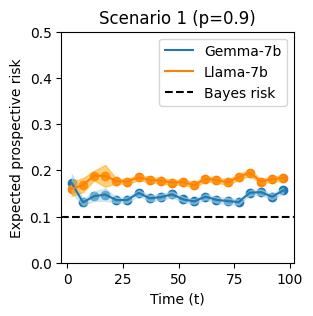

In [16]:
plt.figure(figsize=(3, 3))
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(perf[:, 0], llama_s1.mean(1)[:, 1])
plt.axhline(y=0.1, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1])
plt.scatter(perf[:, 0], llama_s1.mean(1)[:, 1])

plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='lightblue')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='orange')


plt.ylim([0, 0.5])

plt.title("Scenario 1 (p=0.9)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

plt.savefig("../figures/scenario1_p90.pdf", bbox_inches="tight")

plt.show()

# Scenario 1 - p=0.75

In [17]:
gemma_s1 = np.load("../data/scenario1_gemma-7b_75.npy")
llama_s1 = np.load("../data/scenario1_Llama-2-7b-hf_75.npy")

In [18]:
perf = gemma_s1.mean(1)
mean = perf[:, 1]
std = gemma_s1.std(1)[:, 1] / np.sqrt(100.0)

In [19]:
mean_l = llama_s1.mean(1)[:, 1]
std_l = llama_s1.std(1)[:, 1] / np.sqrt(100.0)

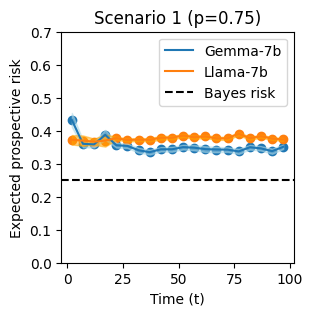

In [21]:
plt.figure(figsize=(3, 3))
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(perf[:, 0], llama_s1.mean(1)[:, 1])
plt.axhline(y=0.25, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1])
plt.scatter(perf[:, 0], llama_s1.mean(1)[:, 1])


plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='lightblue')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='orange')



plt.ylim([0, 0.7])

plt.title("Scenario 1 (p=0.75)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

plt.savefig("../figures/scenario1_p75.pdf", bbox_inches="tight")

plt.show()

# Scenario 2 

In [76]:
gemma_s2 = np.load("../data/scenario2_gemma-7b_75.npy")
llama_s2 = np.load("../data/scenario2_Llama-2-7b-hf_75.npy")

In [77]:
perf = np.nanmean(gemma_s2, axis=1)
mean = perf[:, 1]
std = np.nanstd(gemma_s2, axis=1)[:, 1] / np.sqrt(100.0)

In [78]:
mean_l = llama_s2.mean(1)[:, 1]
std_l = llama_s2.std(1)[:, 1] / np.sqrt(100.0)

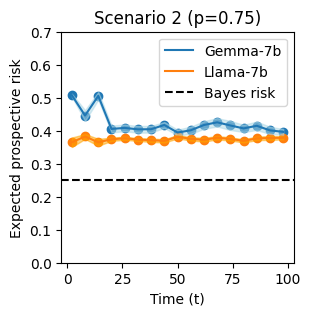

In [80]:
plt.figure(figsize=(3, 3))

plt.plot(perf[:, 0], perf[:, 1])
plt.plot(perf[:, 0], llama_s2.mean(1)[:, 1])
plt.axhline(y=0.25, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1])
plt.scatter(perf[:, 0], llama_s2.mean(1)[:, 1])


plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='lightblue')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='orange')



plt.ylim([0, 0.7])

plt.title("Scenario 2 (p=0.75)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

plt.savefig("../figures/scenario2_p75.pdf", bbox_inches="tight")

plt.show()

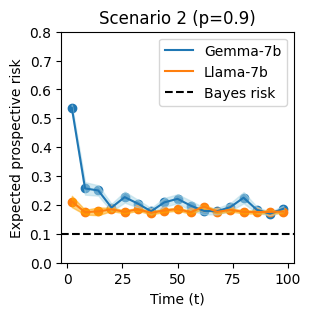

In [81]:
gemma_s2 = np.load("../data/scenario2_gemma-7b_90.npy")
llama_s2 = np.load("../data/scenario2_Llama-2-7b-hf_90.npy")

perf = np.nanmean(gemma_s2, axis=1)
mean = perf[:, 1]
std = np.nanstd(gemma_s2, axis=1)[:, 1] / np.sqrt(100.0)

mean_l = llama_s2.mean(1)[:, 1]
std_l = llama_s2.std(1)[:, 1] / np.sqrt(100.0)

plt.figure(figsize=(3, 3))
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(perf[:, 0], llama_s1.mean(1)[:, 1])
plt.axhline(y=0.1, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1])
plt.scatter(perf[:, 0], llama_s1.mean(1)[:, 1])

plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='lightblue')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='orange')


plt.ylim([0, 0.8])

plt.title("Scenario 2 (p=0.9)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

plt.savefig("../figures/scenario2_p90.pdf", bbox_inches="tight")

plt.show()

# Scenario 3

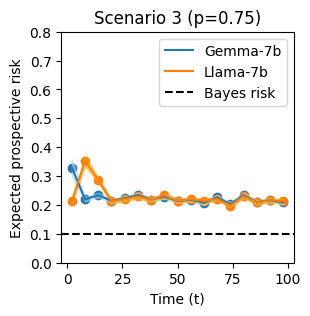

In [114]:
#gemma_s = np.load("../data/scenario2_gemma-7b_90.npy")
llama_s3 = np.load("../data/scenario3_Llama-2-7b-hf_75.npy")
gemma_s3 = np.load("../data/scenario3_gemma-7b_75.npy")

perf = np.nanmean(gemma_s3, axis=1)
mean = perf[:, 1]
std = np.nanstd(gemma_s3, axis=1)[:, 1] / np.sqrt(100.0)

mean_l = llama_s3.mean(1)[:, 1]
std_l = llama_s3.std(1)[:, 1] / np.sqrt(100.0)

plt.figure(figsize=(3, 3))
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(perf[:, 0], llama_s3.mean(1)[:, 1])
plt.axhline(y=0.1, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1])
plt.scatter(perf[:, 0], llama_s3.mean(1)[:, 1])

plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='lightblue')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='orange')


plt.ylim([0, 0.8])

plt.title("Scenario 3 (p=0.75)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

plt.savefig("../figures/scenario3_p75.pdf", bbox_inches="tight")

plt.show()

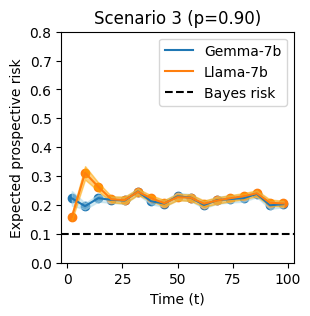

In [115]:
#gemma_s = np.load("../data/scenario2_gemma-7b_90.npy")
llama_s3 = np.load("../data/scenario3_Llama-2-7b-hf_90.npy")
gemma_s3 = np.load("../data/scenario3_gemma-7b_90.npy")

perf = np.nanmean(gemma_s3, axis=1)
mean = perf[:, 1]
std = np.nanstd(gemma_s3, axis=1)[:, 1] / np.sqrt(100.0)

mean_l = llama_s3.mean(1)[:, 1]
std_l = llama_s3.std(1)[:, 1] / np.sqrt(100.0)

plt.figure(figsize=(3, 3))
plt.plot(perf[:, 0], perf[:, 1])
plt.plot(perf[:, 0], llama_s3.mean(1)[:, 1])
plt.axhline(y=0.1, color='black', linestyle='--')

plt.scatter(perf[:, 0], perf[:, 1])
plt.scatter(perf[:, 0], llama_s3.mean(1)[:, 1])

plt.fill_between(perf[:, 0], mean - std, mean + std, alpha=0.5, color='lightblue')
plt.fill_between(perf[:, 0], mean_l - std_l, mean_l + std_l, alpha=0.5, color='orange')


plt.ylim([0, 0.8])

plt.title("Scenario 3 (p=0.90)")
plt.xlabel("Time (t)")
plt.ylabel("Expected prospective risk")
plt.legend(["Gemma-7b", "Llama-7b", 'Bayes risk'])

plt.savefig("../figures/scenario3_p90.pdf", bbox_inches="tight")

plt.show()